      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152 152
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576846
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123907
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921933


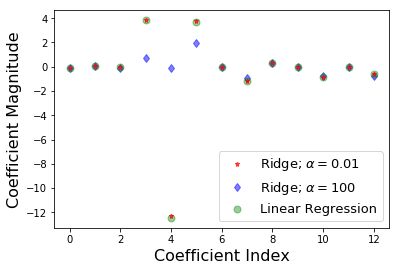

In [16]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Load the data
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
# Print boston_df.info()

# Add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
# Print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print(newX[0:3])  # check 
newY=boston_df['Price']

# Print type(newY)
# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely

# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

# Print the scores
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score) 
print("ridge regression test score low alpha:", Ridge_test_score) 
print("ridge regression train score high alpha:", Ridge_train_score100) 
print("ridge regression test score high alpha:", Ridge_test_score100) 

# Plot the results
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

training score: 0.5600974529893079
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498829
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha =0.01: 10
training score for alpha=0.0001: 0.7754092006936697
test score for alpha =0.0001:  0.7318608210757909
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055069
LR test score:  0.7329325010888662


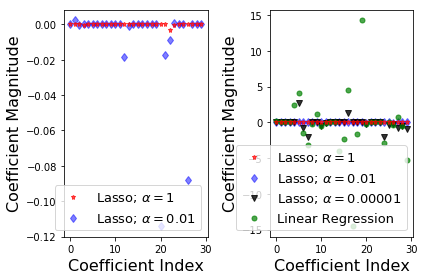

In [18]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#print cancer_df.head(3)
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score ) 
print("test score: ", test_score) 
print("number of features used: ", coeff_used) 
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)  
print("test score for alpha =0.01: ", test_score001) 
print("number of features used: for alpha =0.01:", coeff_used001) 
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001)  
print("test score for alpha =0.0001: ", test_score00001) 
print("number of features used: for alpha =0.0001:", coeff_used00001) 
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score)  
print("LR test score: ", lr_test_score) 
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()




In [19]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Create a DataFrame
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
# Add dependent variable
boston_df['House_Price']=boston.target
x=boston_df.drop('House_Price', axis=1)
y=boston_df['House_Price']

In [34]:
train_x, test_x, train_y, test_y =train_test_split(x,y, test_size=0.3, random_state =1)

In [38]:
test_x.shape

(152, 13)

In [39]:
train_y.shape

(354,)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
lm=LinearRegression()
lm_lasso=Lasso()
lm_ridge=Ridge()
lm_elastic=ElasticNet()

In [43]:
# Fit a model
lm.fit(train_x, train_y)
lm_lasso.fit(train_x, train_y)
lm_ridge.fit(train_x, train_y)
lm_elastic.fit(train_x, train_y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

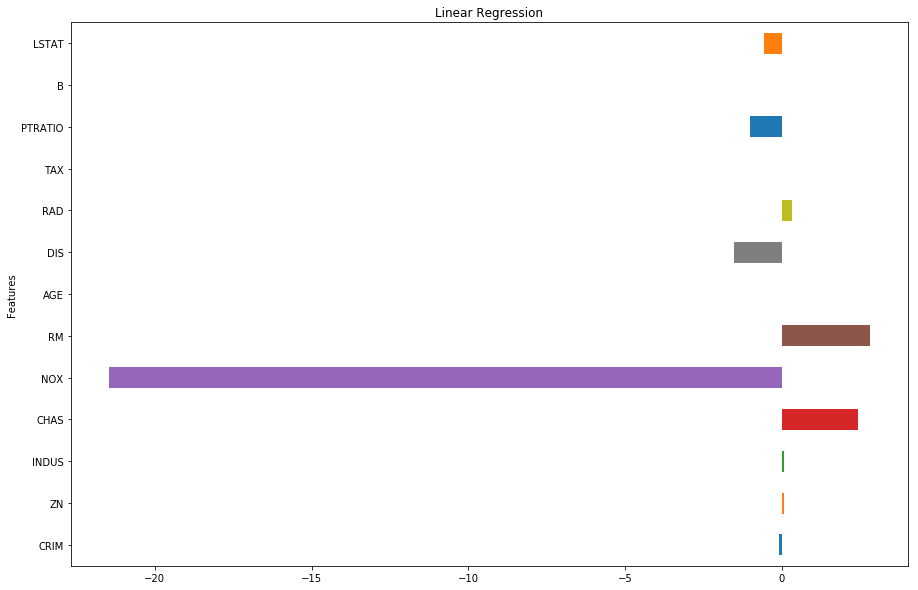

In [48]:
# Evaluate the model
plt.figure(figsize=(15,10))
ft_importance_lm=pd.Series(lm.coef_, index=x.columns)
ft_importance_lm.plot(kind='barh')
plt.title('Linear Regression')
plt.ylabel('Features')
plt.show();

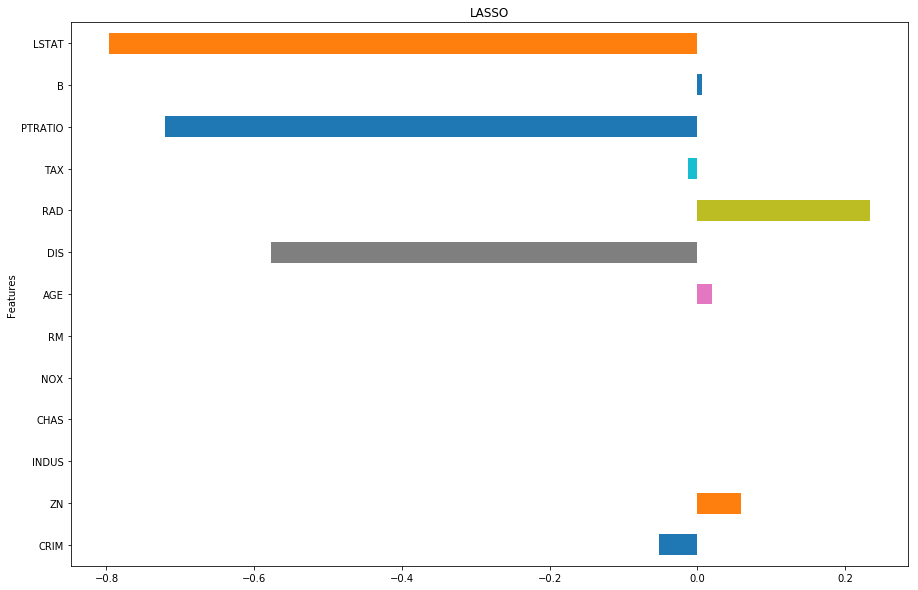

In [49]:
# Evaluate the model
plt.figure(figsize=(15,10))
ft_importance_lm_lasso=pd.Series(lm_lasso.coef_, index=x.columns)
ft_importance_lm_lasso.plot(kind='barh')
plt.title('LASSO')
plt.ylabel('Features')
plt.show();

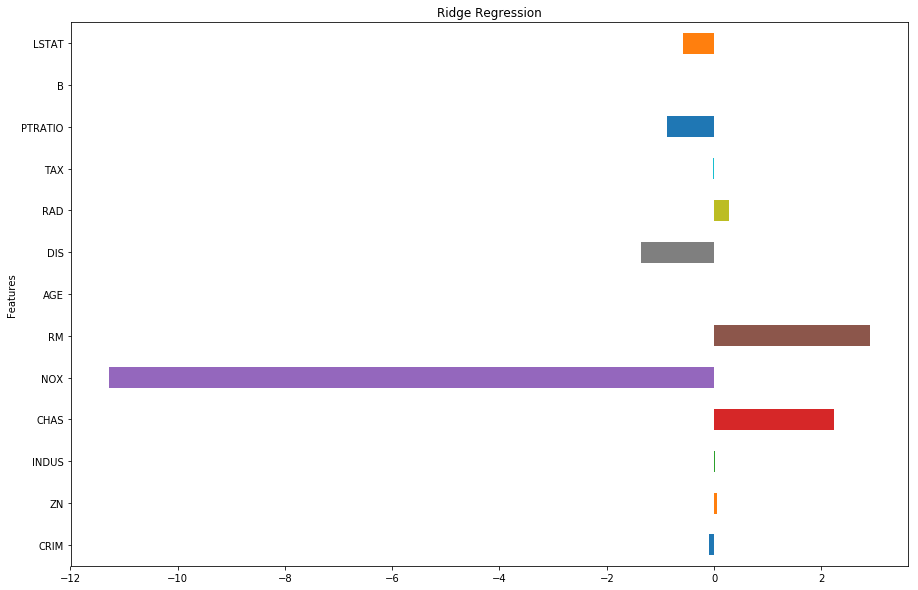

In [50]:
# Evaluate the model
plt.figure(figsize=(15,10))
ft_importance_lm_ridge=pd.Series(lm_ridge.coef_, index=x.columns)
ft_importance_lm_ridge.plot(kind='barh')
plt.title('Ridge Regression')
plt.ylabel('Features')
plt.show();

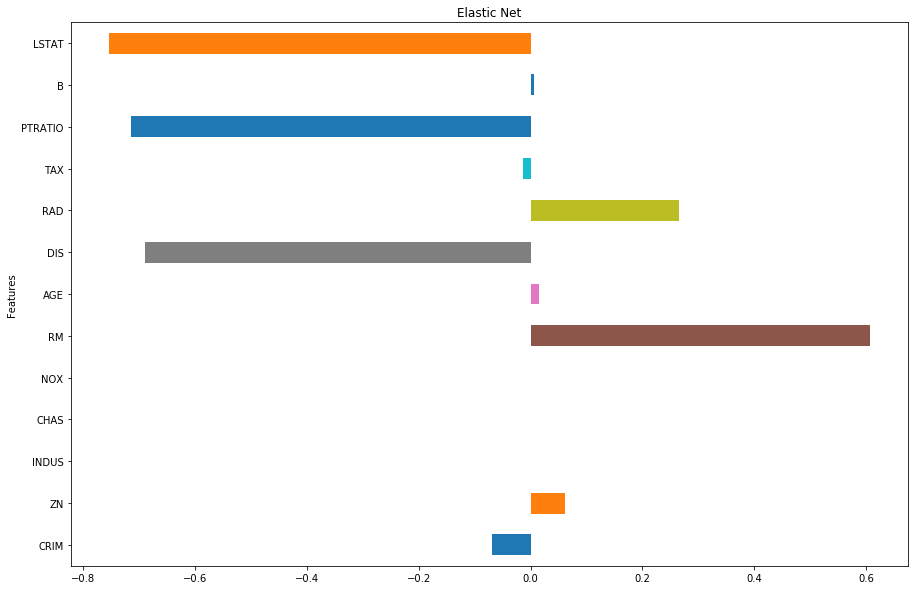

In [51]:
# Evaluate the model
plt.figure(figsize=(15,10))
ft_importance_lm_elastic=pd.Series(lm_elastic.coef_, index=x.columns)
ft_importance_lm_elastic.plot(kind='barh')
plt.title('Elastic Net')
plt.ylabel('Features')
plt.show();

In [58]:
print("R square value for Linear Regression model test data is-")
np.round(lm.score(test_x, test_y)*100,2)


R square value for Linear Regression model test data is-


78.36

In [59]:
print("R square value for LASSO regression model test data is-")
np.round(lm_lasso.score(test_x, test_y)*100,2)

R square value for LASSO regression model test data is-


66.95

In [60]:
print("R square value for Ridge Regression model test data is-")
np.round(lm_ridge.score(test_x, test_y)*100,2)

R square value for Ridge Regression model test data is-


78.91

In [61]:
print("R square value for Elastic Net model test data is-")
np.round(lm_elastic.score(test_x, test_y)*100,2)

R square value for Elastic Net model test data is-


69.98

In [62]:
# Predict on test and training data
predict_test_lm= lm.predict(test_x)

In [63]:
predict_test_lm_lasso= lm_lasso.predict(test_x)

In [66]:
predict_test_lm_ridge= lm_ridge.predict(test_x)

In [67]:
predict_test_lm_elastic= lm_elastic.predict(test_x)

In [72]:
import numpy as np
from sklearn import metrics
# Determine the Mean Squared Error (MSE) for each model
print("Linear Regression MSE for test data is")
np.round(metrics.mean_squared_error(test_y, predict_test_lm),2)

Linear Regression MSE for test data is


19.83

In [70]:
print("LASSO Regression MSE for test data is")
np.round(metrics.mean_squared_error(test_y, predict_test_lm_lasso),2)

LASSO Regression MSE for test data is


30.29

In [71]:
print("Ridge Regression MSE for test data is")
np.round(metrics.mean_squared_error(test_y, predict_test_lm_ridge),2)

Ridge Regression MSE for test data is


19.33

In [74]:
print("Elastic Net Regression MSE for test data is")
np.round(metrics.mean_squared_error(test_y, predict_test_lm_elastic),2)

Elastic Net Regression MSE for test data is


27.51